<a href="https://colab.research.google.com/github/benbaz-2/comp551/blob/Aziz/a2-aziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

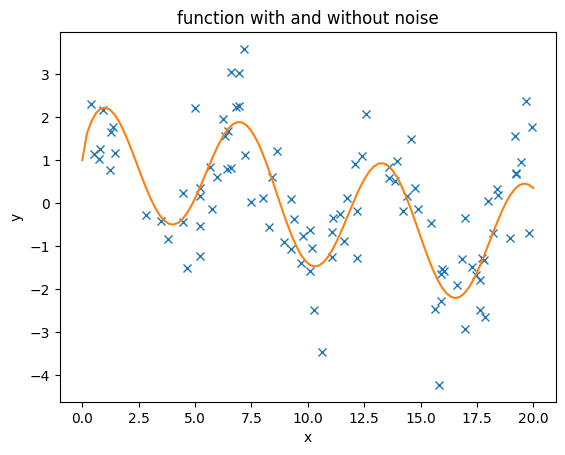

In [55]:
# Generating the data
x = np.random.uniform(0, 20, 100)
x = np.sort(x)

f = lambda x: np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x)
e = np.random.normal(0, 1, 100)
y = f(x) + e

# Defining the range for plotting
range = np.linspace(0, 20, 100)

# Plotting the data
plt.plot(x, y, 'x')
plt.plot(range, f(range))

plt.title('function with and without noise')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'gaussian(x)')

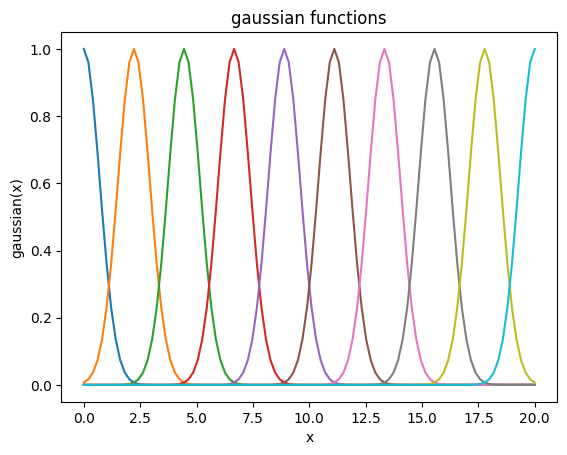

In [14]:
# Defining the gaussian function
gaussian = lambda x, mu: np.exp(-(x-mu)**2)

# Plotting various gaussian functions with different means
mus = np.linspace(0, 20, 10)
for mu in mus:
    plt.plot(range, gaussian(range, mu))

plt.title('gaussian functions')
plt.xlabel('x')
plt.ylabel('gaussian(x)')

In [44]:
# Implementing the linear regression model

class LinearRegression:
  def __init__(self, add_bias=True):
    self.add_bias = add_bias
    self.w = None

  def fit(self, X, y):
    # Convert X and y to numpy arrays with the right shape
    if X.ndim == 1:
      X = np.array(X).reshape(-1, 1)
    if y.ndim == 1:
      y = np.array(y).reshape(-1, 1)
    N = X.shape[0]

    # Add bias term to X if necessary
    if self.add_bias:
      X = np.hstack((np.ones((N, 1)), X))

    # Calculate the weights using the normal equation
    self.w = np.linalg.pinv(X.T @ X) @ X.T @ y

    return self

  # Predict yh give input X
  def predict(self, X):
    if X.ndim == 1:
      X = np.array(X).reshape(-1, 1)
    if self.add_bias:
      X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ self.w

  # This method calculates the loss
  def loss(self, X, y):
    return np.mean((y - self.predict(X))**2)

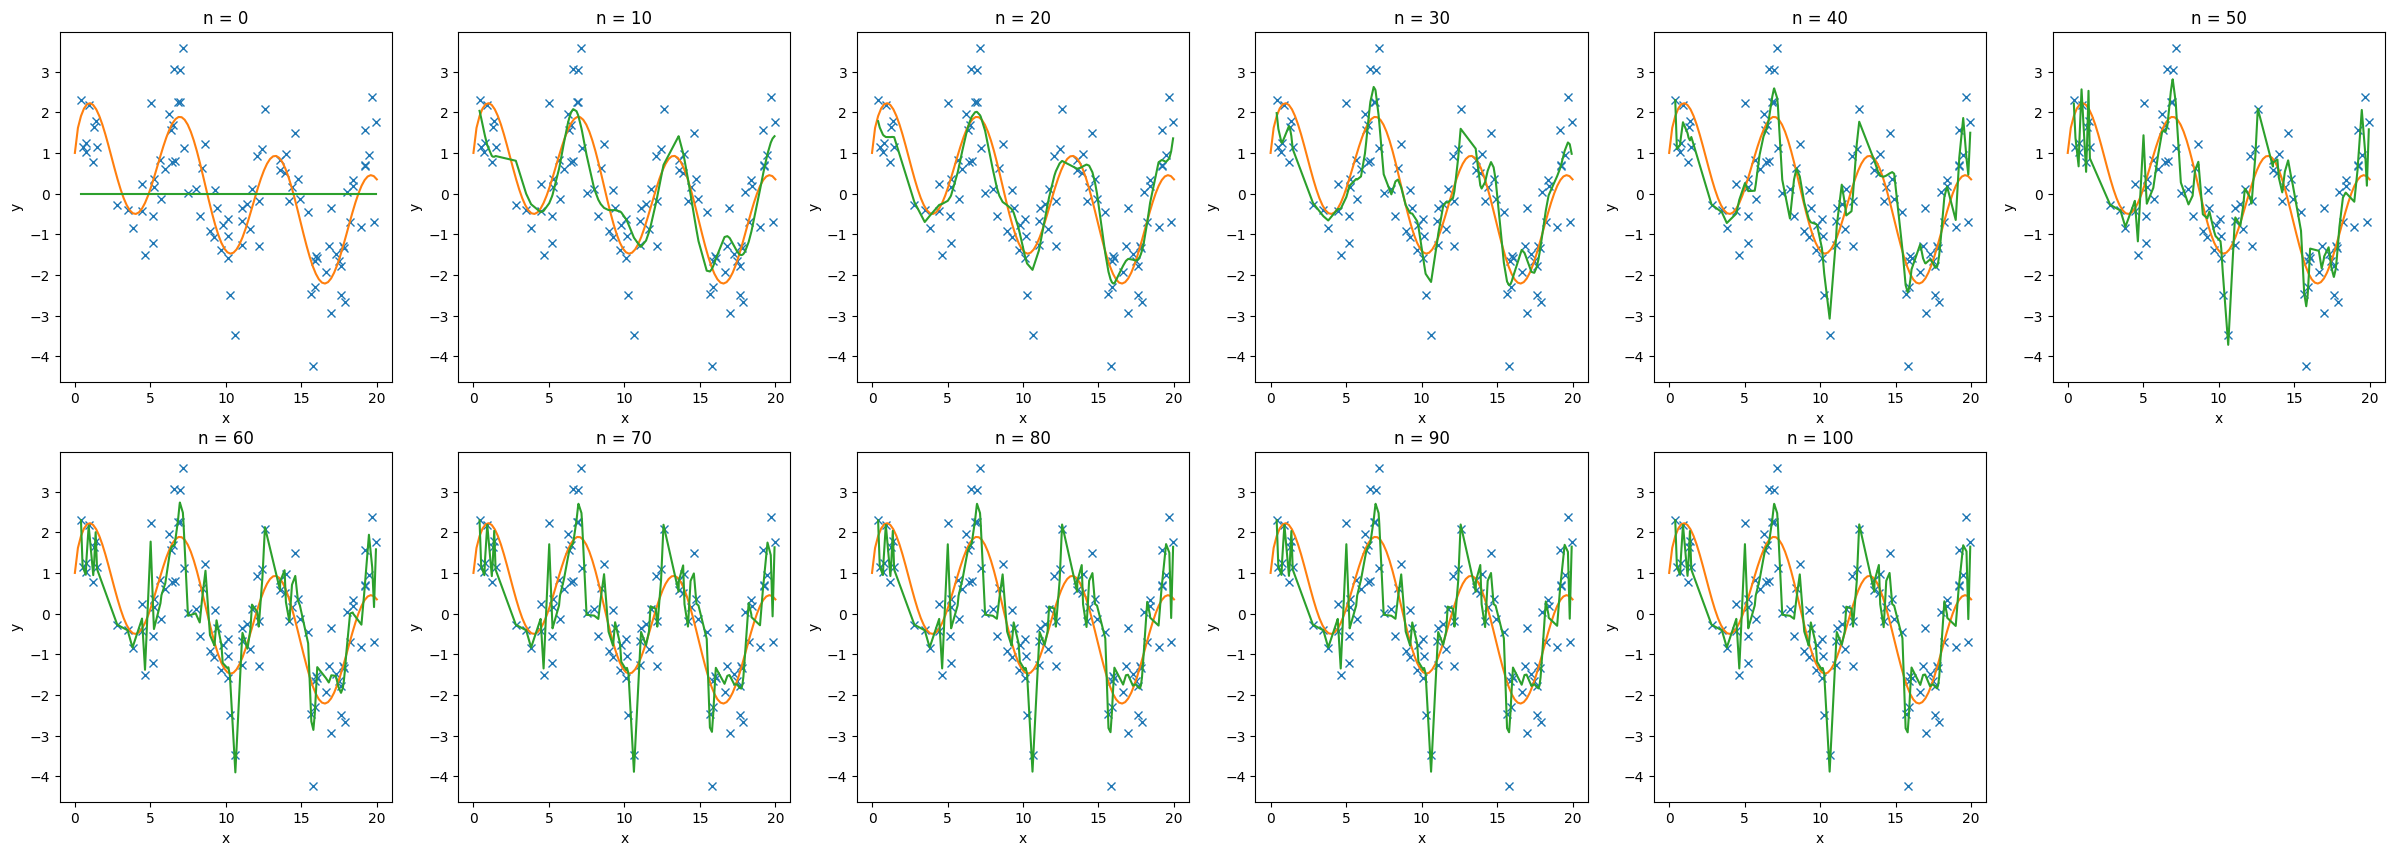

In [58]:

# Fitting the model using different numbers of Gaussian bases and plotting the results

# List of different numbers of Gaussian bases to be used in the model
num_gaussian_bases = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a figure with subplots for displaying the results
fig, ax = plt.subplots(2, 6, figsize=(30, 10))
ax = ax.flatten()  # Flatten the axes array to make it easier to iterate over

# Loop through each number of Gaussian bases to fit the model and plot the results
for i, n in enumerate(num_gaussian_bases):

    # Initialize a design matrix (X) with the correct size (n columns for Gaussian bases)
    X = np.zeros((len(x), n))

    # Define the means (mu) for the Gaussian functions, evenly spaced across the range
    mus = np.linspace(0, 20, n)

    # Calculate each Gaussian function for different means and store in the design matrix
    for j, mu in enumerate(mus):
        X[:, j] = gaussian(x, mu)

    # Initialize and fit the linear regression model using the design matrix
    model = LinearRegression()
    model.fit(X, y)

    # Plot the results on the corresponding subplot
    ax[i].set_title(f'n = {n}')        # Set the title indicating the number of bases
    ax[i].set_xlabel('x')              # Label x-axis
    ax[i].set_ylabel('y')              # Label y-axis

    # Scatter plot of the original data (x, y)
    ax[i].plot(x, y, 'x')

    # Plot the true function (f) over a range of x-values
    ax[i].plot(range, f(range))

    # Plot the model's prediction based on the fitted Gaussian basis
    ax[i].plot(x, model.predict(X))

ax[-1].set_visible(False) # This is hiding the last unused axis